<a href="https://colab.research.google.com/github/MassimilianoBiancucci/Tensorflow-exercises/blob/master/MLPs/Training_an_MLP_network_on_MINST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training an MLP network on MINST dataset

In [0]:
import tensorflow as tf
import time

Importing the **minst** dataset from tensorflow

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist_data = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

Model declaration:
In this section, we set all numeric variables needed for the training .


In [0]:
input_size = 784 #number of pixel per sprite in minst dataset (28x28)
no_classes = 10 #number of labels in minst dataset (0 .. 9)
batch_size = 100 #number of elements in each batch
total_batches = 200 #number of batches (total elements / elements x batch)
iterNum = 110 #number of iteration, each iteration is a complete training over all dataset 


Now we set the tensorflow placeholder for input elements, and labels, we also declare a keep_prob variable for change the dropout probability during training or prediction. (remember tensorflow is  declarative framework!!)

In [0]:
x_input = tf.placeholder(tf.float32, shape=[None, input_size]) #input data placeholder 
y_input = tf.placeholder(tf.float32, shape=[None, no_classes]) #label data placeholder
keep_prob = tf.placeholder(tf.float32) #dropuot keep_prob placeholder

In the block below we declare the first layer of our MLP network.
The first step is d eclare the tf.variables, in short terms this are our tensors with which we go to work.

**weights**:
is a matrix (a 2D tensor), we can see this as a layer with a number of ingress given from first argument (input_size), the number of output is given from the second argument.
note that this tesor are initialized with random numbers, given from normal distribution between 0 and 1 (Gaussian).

**bais**:
Bais is a vector (a 1D tensor), also in this case we use the random initialization. the bais element represent for each neuron the mean output. note that the bais vector need to have the same lenght of the output of its layer, in this case input_size value

 **matmul**:
this command execute the simple matrix multiplication

**relu**:
(rectified linear unit) Is the non-linear function applied to the output of each neuron. 

**dropout**:
with the **keep_prob** parameter it inserts a probability, with which each output of the layer is not forced to zero. it is possible to set alternatively the **rate** parameter (= 1 - **keep_prob**) which represents the probability that each neuron in the layer is forced to zero. This is a trick that increase the generalization of the network, and limit the overfitting problems, forcing the network to learn the desired function disabling for each time a different subset of its neurons.

![alt text](https://i2.wp.com/laid.delanover.com/wp-content/uploads/2018/02/dropout.png)





In [0]:
weights = tf.Variable(tf.random_normal([input_size, input_size]))
bias = tf.Variable(tf.random_normal([input_size]))
out1 = tf.matmul(x_input, weights) + bias
out1 = tf.nn.relu(out1)
out1 = tf.nn.dropout(out1, keep_prob = keep_prob)

below we declare the output layer, note that in thos case we declare the layer whitout the relu function, because it is an output layer, and now we are using a one_hot encoding for output (this output encoding is used for classification problem which have exclusive class) and the right output function to apply is the softmax function, which tend to maximize the max output and lessen the other outputs.

In [0]:
weights2 = tf.Variable(tf.random_normal([input_size, no_classes]))
bias2 = tf.Variable(tf.random_normal([no_classes]))
logits = tf.matmul(out1, weights2) + bias2
logits = tf.nn.dropout(logits, keep_prob = keep_prob)

In the upper block, we had talk about softmax function but there isn't, because is used in "**tf.nn.softmax_cross_entropy_with_logits_v2**"  for efficency reason, and we don't need to call it before.
This function use internaly the softmax function and more over it compute the loss.

After we call the **tf.reduce_mean** we calculate the mean value of a given tensor

In the end we declare the optimizer, in this case** tf.train.AdagradOptimizer**, it is one of various method that calculate the error gradient and the wheights correction to apply. 



In [0]:
softmax_cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_input, logits=logits)

loss_operation = tf.reduce_mean(softmax_cross_entropy)

optimiser = tf.train.AdagradOptimizer(learning_rate=0.02).minimize(loss_operation)

Session declaration and tf.variables inizialization.

In [0]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In this secction we can see the code necessary to train the network,
for each batch iteration we get another batch from dataset, and charge it in the feed_dict dictionary, more specificaly in x_input and y_input which are respectivly the examples value and the labels for each example in the batch.
moreover we pass at the feed_dict the keep_prob value, or the dropout probability that we have seen before, this is important because this probability must be 1 at prediction time, in other case we don't get the maximum accurancy from our model. note that the optimiser and loss operation upper declared are passed to session.run() in one vector and not in a feed_dict.

In [10]:
a = time.time()
for iterN in range(iterNum):
  for batch_no in range(total_batches):
      mnist_batch = mnist_data.train.next_batch(batch_size)
      _, loss_value = session.run([optimiser, loss_operation], feed_dict={
          x_input: mnist_batch[0],
          y_input: mnist_batch[1],
          keep_prob: 0.6
      })
      
      if(batch_no%20 == 0):
        print(loss_value)
b = time.time()
print("time: " + str(b-a))

3.3299208
2.3180819
3.8581953
4.0287576
4.4691873
2.1641145
4.102499
4.591838
2.1316078
5.841379
0.7715658
3.061236
2.09236
2.7416258
5.495883
2.5753622
5.1138587
2.1222303
2.2476225
2.5187316
4.0413084
2.5636017
3.8038073
4.6144805
4.5736485
2.952957
2.5869439
2.662976
3.9099662
5.047185
6.2030263
4.6398215
3.4318523
2.0512817
2.1829662
2.8952286
4.78704
4.1876225
1.3249328
2.9360163
6.0298047
1.2091436
7.4783278
2.0315766
4.9941616
2.5387092
2.1548755
1.9779618
2.1086955
3.103578
6.3051867
5.4846764
2.9872887
1.8490493
4.9073834
4.3627825
4.850555
7.025911
1.181983
3.6835773
3.379233
4.5003195
3.476905
4.628562
3.3159451
3.623065
7.4460144
3.3617413
3.8521273
3.325979
5.220461
2.0175943
3.0259354
4.5512495
6.905358
3.727067
7.0313563
5.0646725
3.7388456
3.735065
2.6116493
4.936216
2.784365
1.696641
2.845391
3.968665
4.166579
4.6948476
2.7356799
2.5928977
7.031998
6.195548
3.696665
2.6014118
7.003168
6.700043
3.1088936
2.886723
3.2721558
2.998485
5.295532
2.3415365
2.4522283
7.1300263

After training we want evaluete the generalization power of our model, computing its accurancy on the test dataset,
note that it isn't the dataset that we have used for training it.

step by step.. 

we create the variable **predictions**, which is the result of **tf.argmax**, this function return the index of max value contained in the tensor passed (logits that is the output vector of our model), at given axis (1 in this case).

**correct predictions** is a simple test condition, that return true if the predicted output is the same of the label, else where false.

**acurancy_operation**  the computed mean of prediction reult (1 correct or 0 wrong) in each example passed

**note** that **acurancy_operation** at line 3 it isn't a value but a set of instruction to compute whene the session.run() is called, for this reason we pass it as an argument to session.run().

as seen before we call session.run() and pass to it all necessary variables, that this time is the test dataset, and the keep_prob set to 1 for disable the dropout operation. (with 1.0 you tell to the framwork that the probability of disabling one neuron is 0)  


In [11]:
predictions = tf.argmax(logits, 1) #return the index corresponding to max value in the given tensor
correct_predictions = tf.equal(predictions, tf.argmax(y_input, 1)) #return a vector that contain for each example 1 if the result is the same in prediction and label or 0 else where.
accuracy_operation = tf.reduce_mean(tf.cast(correct_predictions, tf.float32)) #compute the mean of the tensor containing the 

test_images, test_labels = mnist_data.test.images, mnist_data.test.labels

accuracy_value = session.run(accuracy_operation, feed_dict={
    x_input: test_images,
    y_input: test_labels,
    keep_prob: 1.0
})
print('Accuracy : ', accuracy_value)
session.close()

Accuracy :  0.9563


**dataset review:**

test image dataset dimensions: (10000, 784)
test label dataset dimensions: (10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


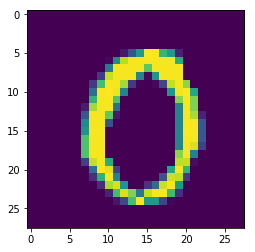

In [25]:
import matplotlib.pyplot as plt
import numpy as np

print("test image dataset dimensions: " + str(np.shape(test_images)))

test_images_np = np.array(test_images[13]) #dataset imege conversion to np.array 
test_images_np = test_images_np.reshape(28, 28) #resizing from vector to matrix form
plt.imshow(test_images_np) #plot.

print("test label dataset dimensions: " + str(np.shape(test_labels))) 
print("labeles 0 to 10:") 
print(np.array(test_labels)[0:10]) #display 10 labels